In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path='/content/gdrive/"My Drive"/"Colab Notebooks"/"SEGMENTED_DATASET"'
%ls{path}

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.applications import ResNet50

In [ ]:
import os
import cv2
x_train=[]
y_train=[]
x_test=[]
y_test=[]
imagepaths1 = []
imagepaths2 = []
for i in range(4):
  image1path=f"/content/gdrive/MyDrive/Colab Notebooks/SEGMENTED_DATASET/train/{i}/"
  image2path=f"/content/gdrive/MyDrive/Colab Notebooks/SEGMENTED_DATASET/test/{i}/"
  file1=os.listdir(image1path)
  for f in file1:
    final1=image1path+f
    img = cv2.imread(final1) # Reads image and returns np.array
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
    img = cv2.resize(img, (200, 200))
    x_train.append(img)
    y_train.append(i)

  file2=os.listdir(image2path)
  for f in file2:
    final2=image2path+f
    img = cv2.imread(final2) # Reads image and returns np.array
    #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
    img = cv2.resize(img, (200, 200))
    x_test.append(img)
    y_test.append(i)

**RESNET 50 MODEL**

In [ ]:
resnet_conv = ResNet50(include_top=False,weights="imagenet",input_shape=(200,200,3))
for layer in resnet_conv.layers[:]:
  layer.trainable=False
for layer in resnet_conv.layers:
  print(layer,layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x7f9b7405b1d0> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f9af13e49d0> False
<keras.layers.convolutional.Conv2D object at 0x7f9af13e47d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9af1334890> False
<keras.layers.core.activation.Activation object at 0x7f9af033aed0> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f9af12ed390> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9b74156cd0> False
<keras.layers.convolutional.Conv2D object at 0x7f9af13d6410> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9af13f3d90> False
<keras.layers.core.activation.Activation object at 0x7f9af14193d0> False
<keras.layers.convolutional.Conv2D object at 0x7f9af140b790> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9af1419750> False
<keras.layers.core.activation.Activation object at 0x7f9af13fe390> False

In [ ]:
tensorflow.test.gpu_device_name()

In [ ]:
model=Sequential()
model.add(resnet_conv)
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
x_train = np.array(x_train, dtype="uint8")
y_train = np.array(y_train)
x_test = np.array(x_test, dtype="uint8")
y_test = np.array(y_test)
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=4)
History=model.fit(x_train,y_train, epochs=15, batch_size=200, verbose=2,validation_data=(x_test,y_test)) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 401412    
                                                                 
Total params: 23,989,124
Trainable params: 401,412
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/15
73/73 - 61s - loss: 2.8292 - accuracy: 0.8882 - val_loss: 0.5977 - val_accuracy: 0.9622 - 61s/epoch - 831ms/step
Epoch 2/15
73/73 - 53s - loss: 0.1110 - accuracy: 0.9884 - val_loss: 0.3443 - val_accuracy: 0.9714 - 53s/epoch - 723ms/step
Epoch 3/15
73/73 - 54s - loss: 0.0223 - accuracy: 0.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 4)                 401412    
                                                                 
Total params: 23,989,124
Trainable params: 401,412
Non-trainable params: 23,587,712
_________________________________________________________________


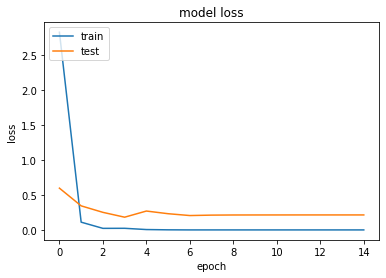

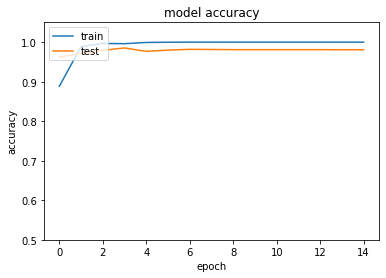

'predictions = model.predict(x_test) # Make predictions towards the test set\ny_pred = np.argmax(predictions, axis=1) # Transform predictions into 1-D array with label number\ny_test = np.argmax(y_test, axis=1)'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0.5,1.05)
plt.show()
'''predictions = model.predict(x_test) # Make predictions towards the test set
y_pred = np.argmax(predictions, axis=1) # Transform predictions into 1-D array with label number
y_test = np.argmax(y_test, axis=1)'''

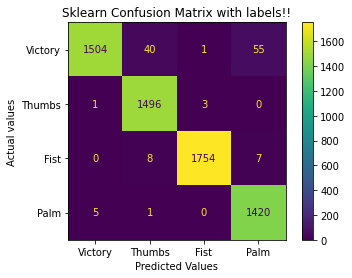

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Victory', 'Thumbs', 'Fist','Palm'])
cmd_obj.plot(values_format='d')
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Values', 
                ylabel='Actual values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1600
           1       0.98      0.99      0.99      1500
           2       1.00      0.99      1.00      1769
           3       0.96      1.00      0.98      1426

    accuracy                           0.98      6295
   macro avg       0.98      0.98      0.98      6295
weighted avg       0.98      0.98      0.98      6295



**PREDICTION**

In [ ]:
tr="/content/gdrive/MyDrive/Colab Notebooks/SEGMENTED_DATA/test/1/1.jpg"

In [ ]:
#m1=[]
t = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/SEGMENTED_DATASET/test/2/4.jpg') # Reads image and returns np.array
#t=cv2.imread(t1)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
t = cv2.resize(t, (200, 200))
#m1.append(tryyy)
#tryyy=np.array(tryyy)
predictions1 = model.predict(t.reshape(1,200,200,3)) 

In [ ]:
import operator
prediction = {'Victory': predictions1[0][0], 
                  'Thumb': predictions1[0][1], 
                  'Fist': predictions1[0][2],
                  'Palm': predictions1[0][3],}
    # Sorting based on top prediction
prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)

In [ ]:
model_json = model.to_json()
with open("RESNETMODEL.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('RESNETMODEL.h5')

**INCEPTION V3 MODEL**


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.applications import InceptionV3
incept_conv = InceptionV3(include_top=False,weights="imagenet",input_shape=(200,200,3))
for layer in incept_conv.layers[:]:
  layer.trainable=False
for layer in incept_conv.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f30fb401d50> False
<keras.layers.convolutional.Conv2D object at 0x7f30f7497290> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f30f27ad6d0> False
<keras.layers.core.activation.Activation object at 0x7f30f1d376d0> False
<keras.layers.convolutional.Conv2D object at 0x7f30f03b3810> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f30f037a110> False
<keras.layers.core.activation.Activation object at 0x7f30f4388c50> False
<keras.layers.convolutional.Conv2D object at 0x7f30f0388750> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f30f74a0e90> False
<keras.layers.core.activation.Activation object at 0x7f30f9b2e890> False
<keras.layers.pooling.MaxPooling2D object at 0x7f30f0392350> False
<keras.layers.convolutional.Conv2D object at 0x7f30f031bc50> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7

In [ ]:
model2=Sequential()
model2.add(incept_conv)
model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dense(4,activation='softmax'))
model2.summary()
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
x_train = np.array(x_train, dtype="uint8")
y_train = np.array(y_train)
x_test = np.array(x_test, dtype="uint8")
y_test = np.array(y_test)
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=4)
History2=model2.fit(x_train,y_train, epochs=15, batch_size=240, verbose=2,validation_data=(x_test,y_test)) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               16777728  
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 38,582,564
Trainable params: 16,779,780
Non-trainable params: 21,802,784
_________________________________________________________________
Epoch 1/15
61/61 - 78s - loss: 191.6389 - accuracy: 0.8089 - val_loss: 16.6591 - val_accuracy: 0.9160 - 78s/epoch - 1s/step
Epoch 2/15
61/61 - 64s - loss: 4.8768 - a

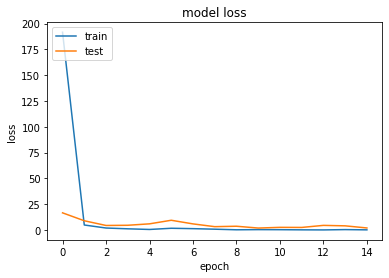

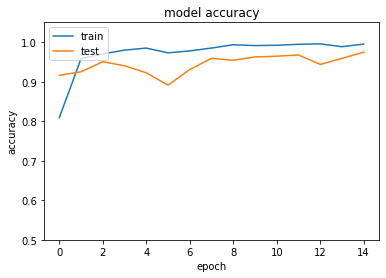

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pandas as pd
plt.plot(History2.history['loss'])
plt.plot(History2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(History2.history['accuracy'])
plt.plot(History2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0.5,1.05)
plt.show()
predictions = model2.predict(x_test) # Make predictions towards the test set
y_pred = np.argmax(predictions, axis=1) # Transform predictions into 1-D array with label number
y_test = np.argmax(y_test, axis=1)

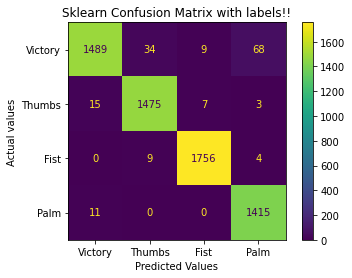

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Victory', 'Thumbs', 'Fist','Palm'])
cmd_obj.plot(values_format='d')
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Values', 
                ylabel='Actual values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1600
           1       0.97      0.98      0.98      1500
           2       0.99      0.99      0.99      1769
           3       0.95      0.99      0.97      1426

    accuracy                           0.97      6295
   macro avg       0.97      0.97      0.97      6295
weighted avg       0.97      0.97      0.97      6295



In [ ]:
model2_json = model2.to_json()
with open("VGGMODELNEW.json", "w") as json_file:
    json_file.write(model2_json)
model2.save_weights('VGGMODELNEW.h5')